In [1]:
import os, sys
import tensorflow as tf
import matplotlib.pyplot as plt
src_dir = os.path.join("../src")
sys.path.insert(0, src_dir)
from dataloader import FrameDataLoaderTF

In [2]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=3000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [3]:
batch_size = 3
batch_frame = 15
epochs = 50
ds = FrameDataLoaderTF("../data/anonymisedVideos", batch_frame, 5, num_clips=12, resolution=[224, 224], batch_size=batch_size)
total_steps = ds.loader.__len__() // batch_size * epochs
total_steps

2021-07-21 21:51:41.517682: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


29800

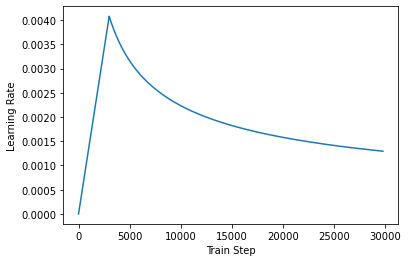

In [8]:
temp_learning_rate_schedule = CustomSchedule(20)

plt.plot(temp_learning_rate_schedule(tf.range(total_steps, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")
plt.show()